##### 数据初步可视化
```
内容回顾：
```
1.单特征可视化：连续变量箱线图（还说了核密度直方图）、离散特征直方图

2.特征和标签关系可视化

3.箱线图美化--->直方图

作业：去针对其他特征绘制单特征图和特征和标签的关系图，并且试图观察出一些有意思的结论


In [13]:
import pandas as pd
data = pd.read_csv('data.csv')
data.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [15]:
continuous_features = []
for i in data.columns:
    if data[i].dtype != 'object':
        continuous_features.append(i)
continuous_features

['Id',
 'Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Credit Default']

In [16]:
countinuous_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
countinuous_features

['Id',
 'Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Credit Default']

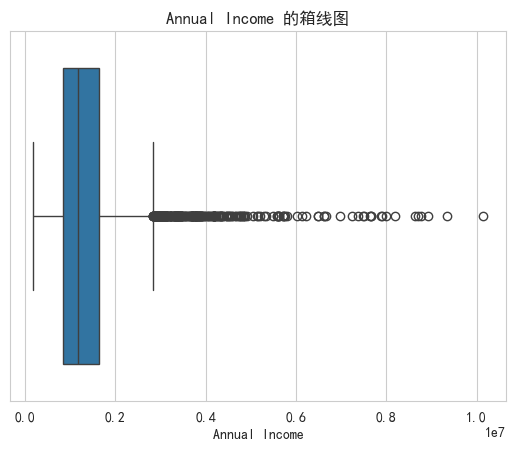

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

sns.boxplot(x = data['Annual Income'])
plt.title('Annual Income 的箱线图')
plt.xlabel('Annual Income')
plt.show()

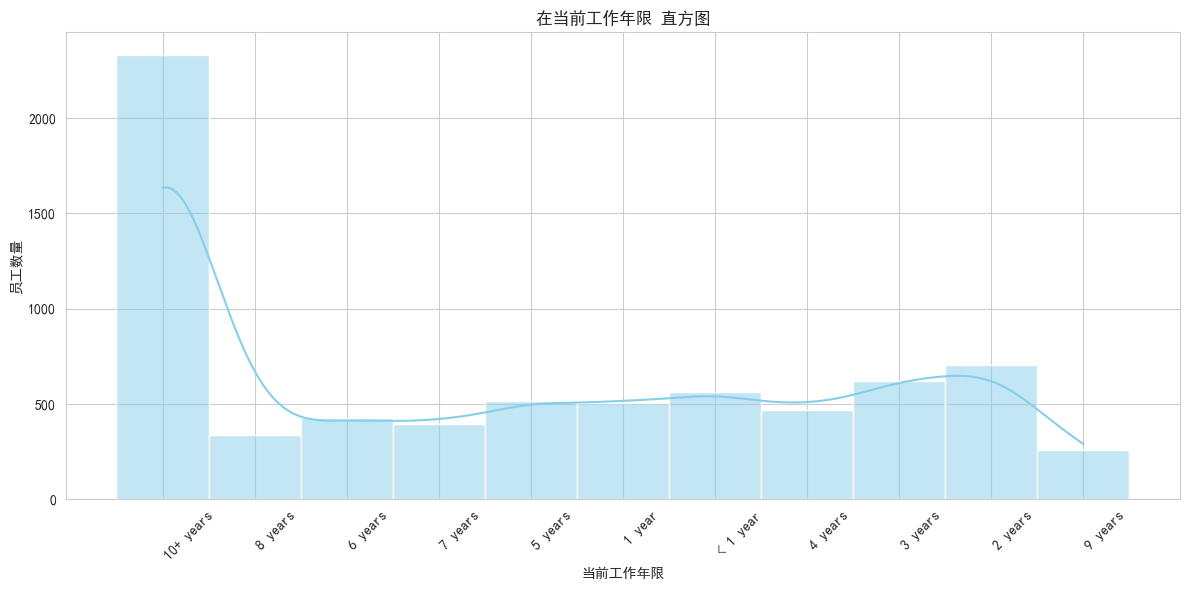

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(data['Years in current job'],
             kde=True,
             bins=20,
             color='skyblue'
             )
plt.title('在当前工作年限 直方图')
plt.xlabel('当前工作年限')
plt.ylabel('员工数量')
plt.xticks(rotation=45,ha='left')
plt.tight_layout()
plt.show()

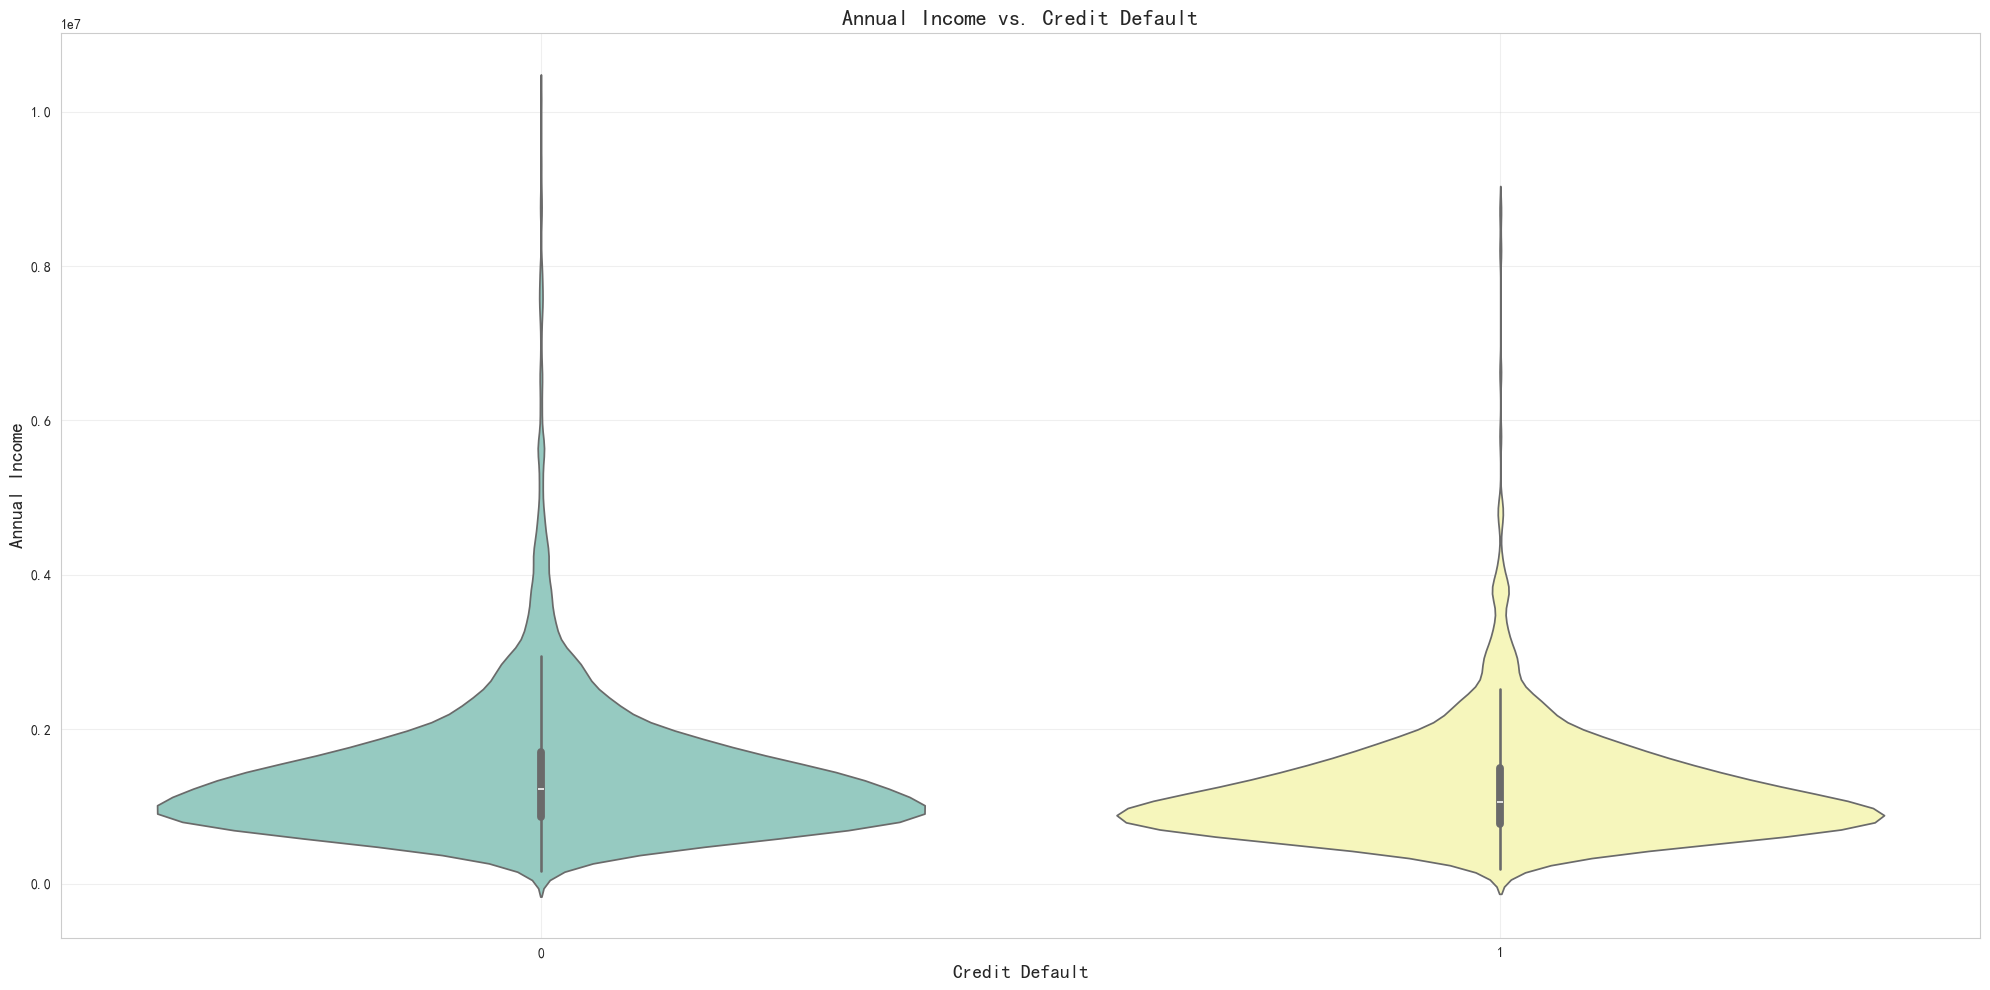

In [40]:
plt.figure(figsize=(20,10))
sns.violinplot(x='Credit Default',
               y='Annual Income',
               data=data,
               hue='Credit Default',
               legend=False,
               palette='Set3')

plt.title('Annual Income vs. Credit Default',
          fontsize=16)
plt.xlabel('Credit Default',fontsize=14)
plt.ylabel('Annual Income',fontsize=14)
plt.grid(True,alpha=0.3)
plt.tight_layout()
plt.show()

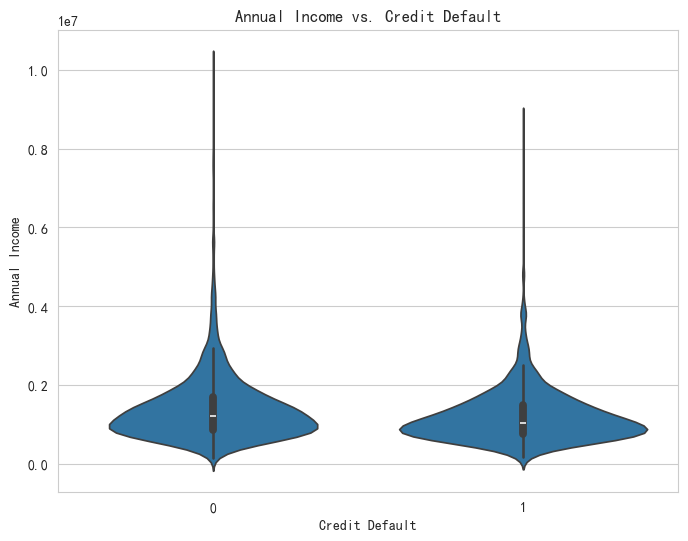

In [41]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Credit Default', y='Annual Income', data=data)
plt.title('Annual Income vs. Credit Default')
plt.xlabel('Credit Default')
plt.ylabel('Annual Income')
plt.show()

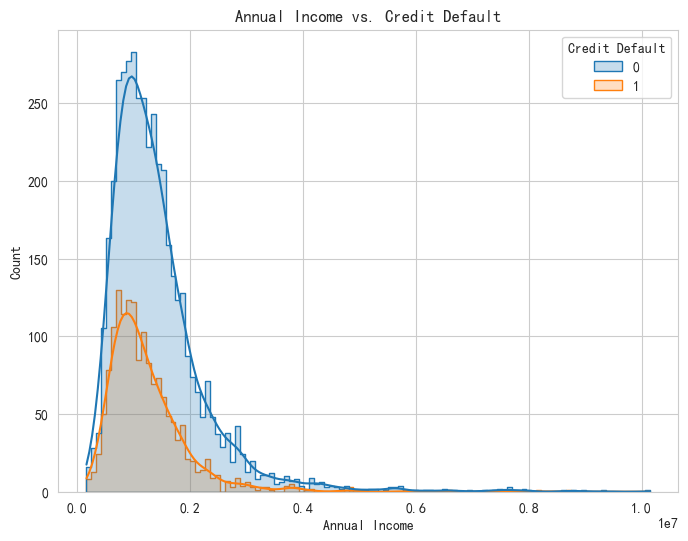

In [42]:

plt.figure(figsize=(8, 6))
sns.histplot(x='Annual Income', hue='Credit Default', data=data, kde=True, element="step")
plt.title('Annual Income vs. Credit Default')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

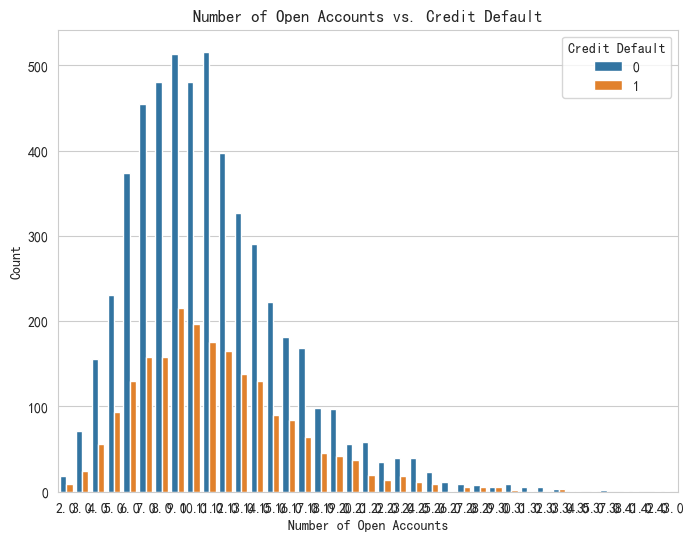

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Number of Open Accounts', hue='Credit Default', data=data)
plt.title('Number of Open Accounts vs. Credit Default')
plt.xlabel('Number of Open Accounts')
plt.ylabel('Count')
plt.show()

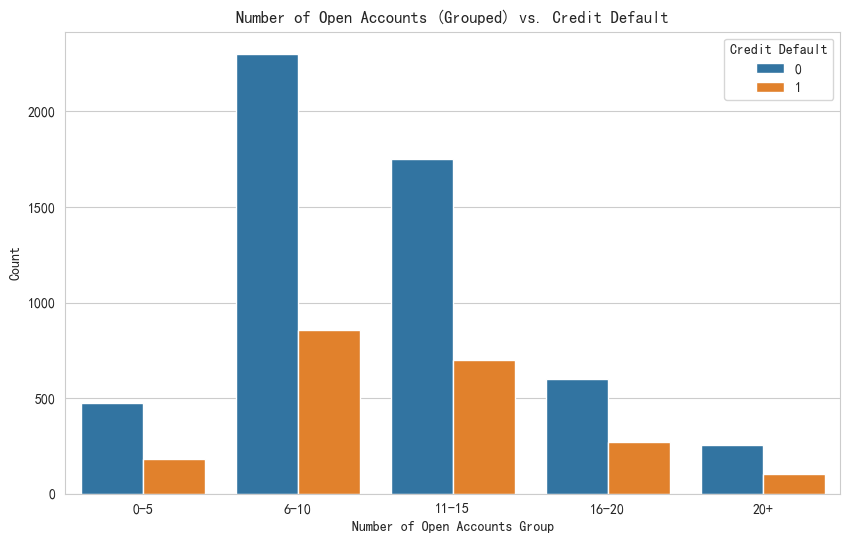

In [44]:
data['Open Accounts Group'] = pd.cut(data['Number of Open Accounts'], bins=[0, 5, 10, 15, 20, float('inf')], labels=['0-5', '6-10', '11-15', '16-20', '20+']) # 根据你的数据调整分组

plt.figure(figsize=(10, 6))
sns.countplot(x='Open Accounts Group', hue='Credit Default', data=data)
plt.title('Number of Open Accounts (Grouped) vs. Credit Default')
plt.xlabel('Number of Open Accounts Group')
plt.ylabel('Count')
plt.show()

数据类型概览：
Id                                 int64
Home Ownership                    object
Annual Income                    float64
Years in current job              object
Tax Liens                        float64
Number of Open Accounts          float64
Years of Credit History          float64
Maximum Open Credit              float64
Number of Credit Problems        float64
Months since last delinquent     float64
Bankruptcies                     float64
Purpose                           object
Term                              object
Current Loan Amount              float64
Current Credit Balance           float64
Monthly Debt                     float64
Credit Score                     float64
Credit Default                     int64
Open Accounts Group             category
dtype: object

连续变量： ['Id', 'Annual Income', 'Tax Liens', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit', 'Number of Credit Problems', 'Months since last delinquent', 'Bankruptcies', '

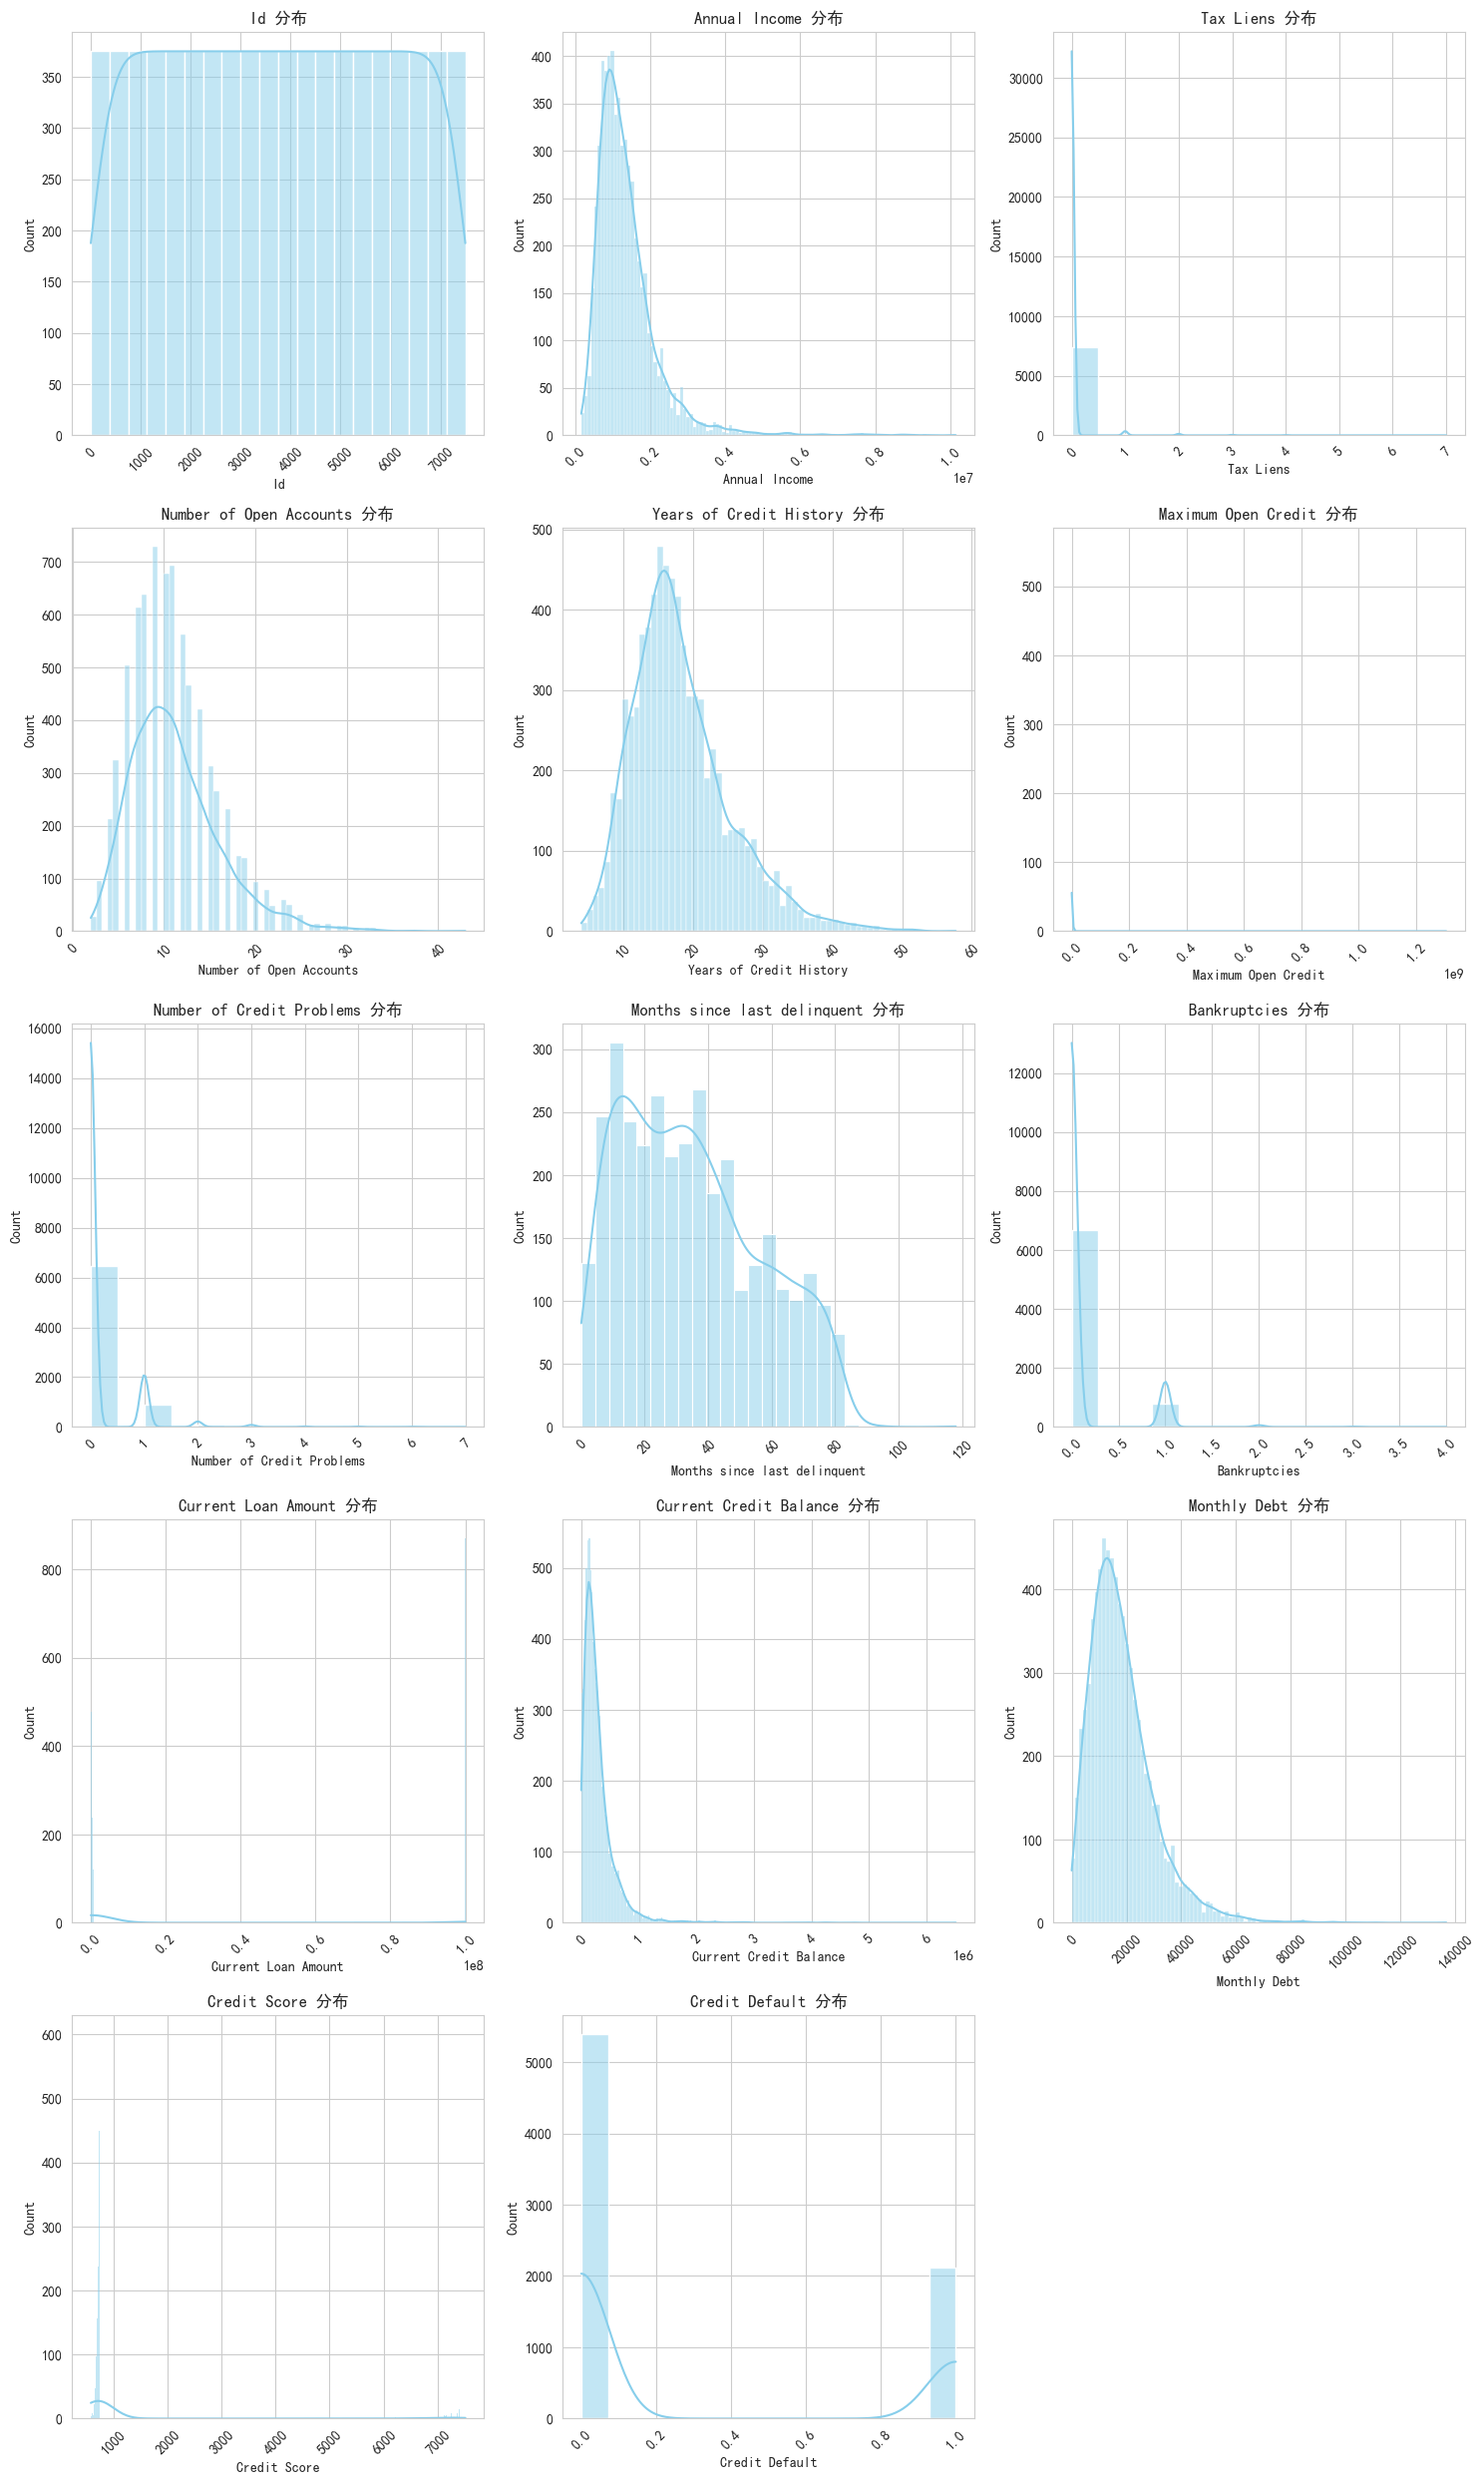

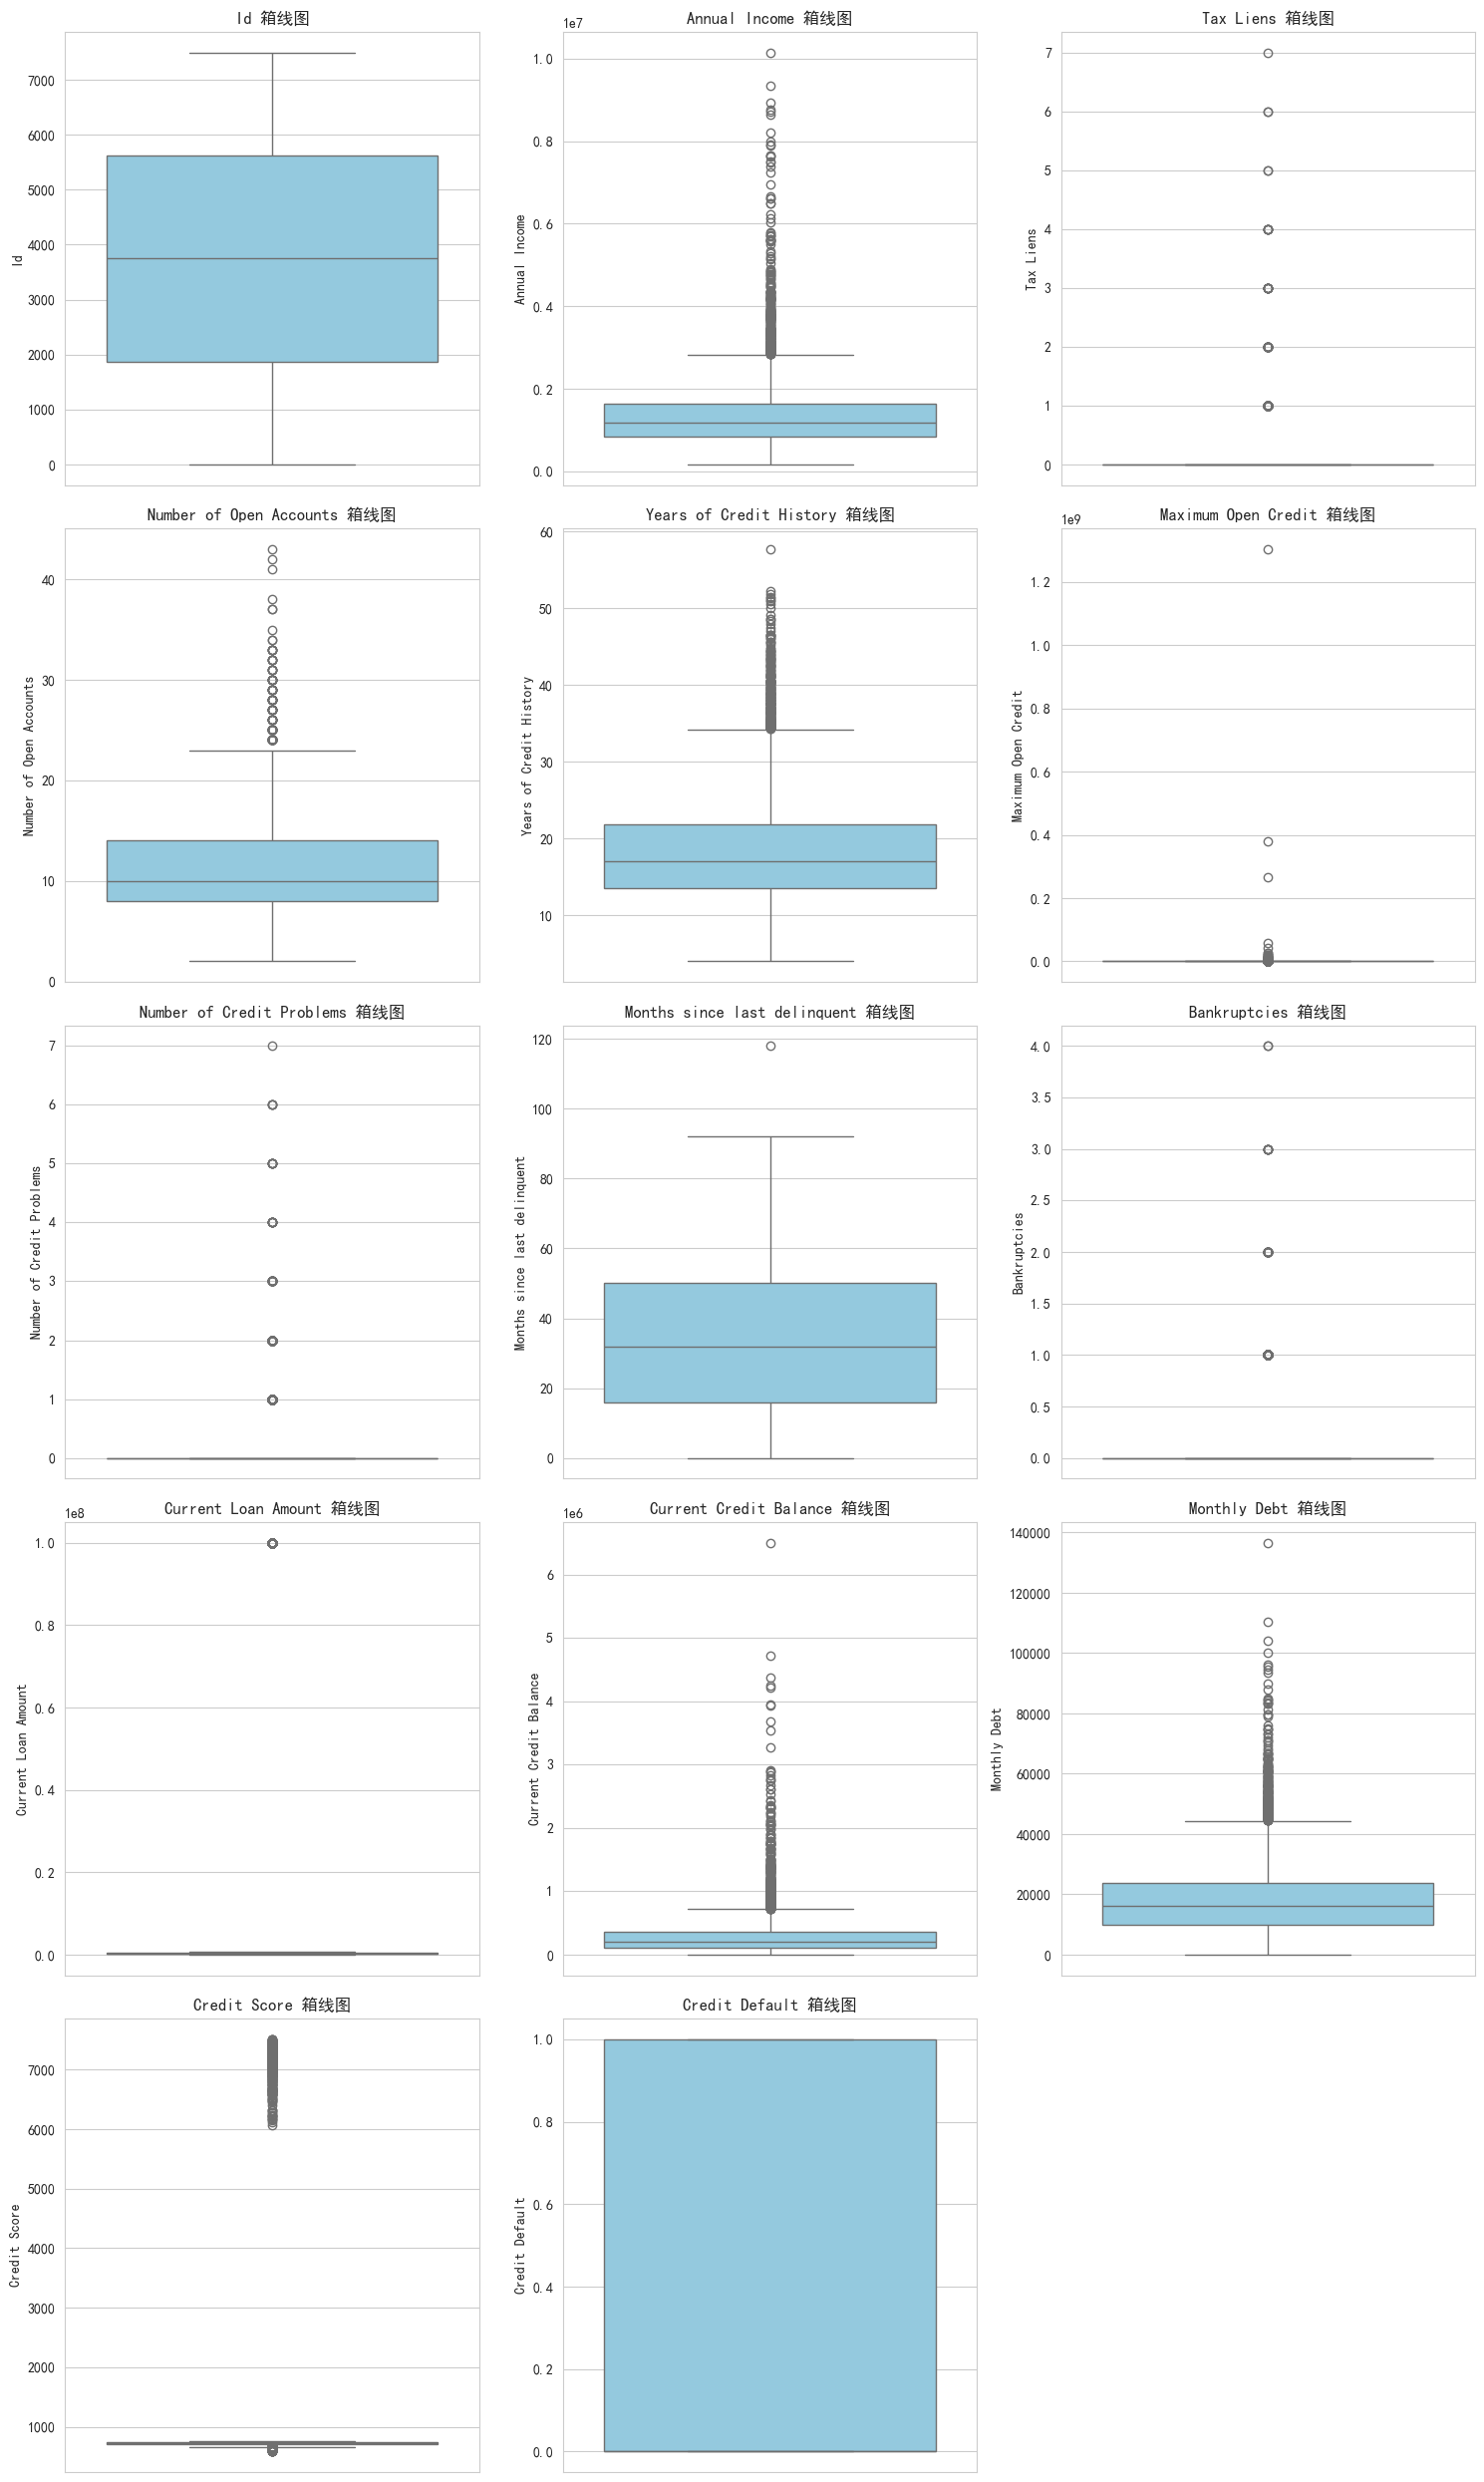

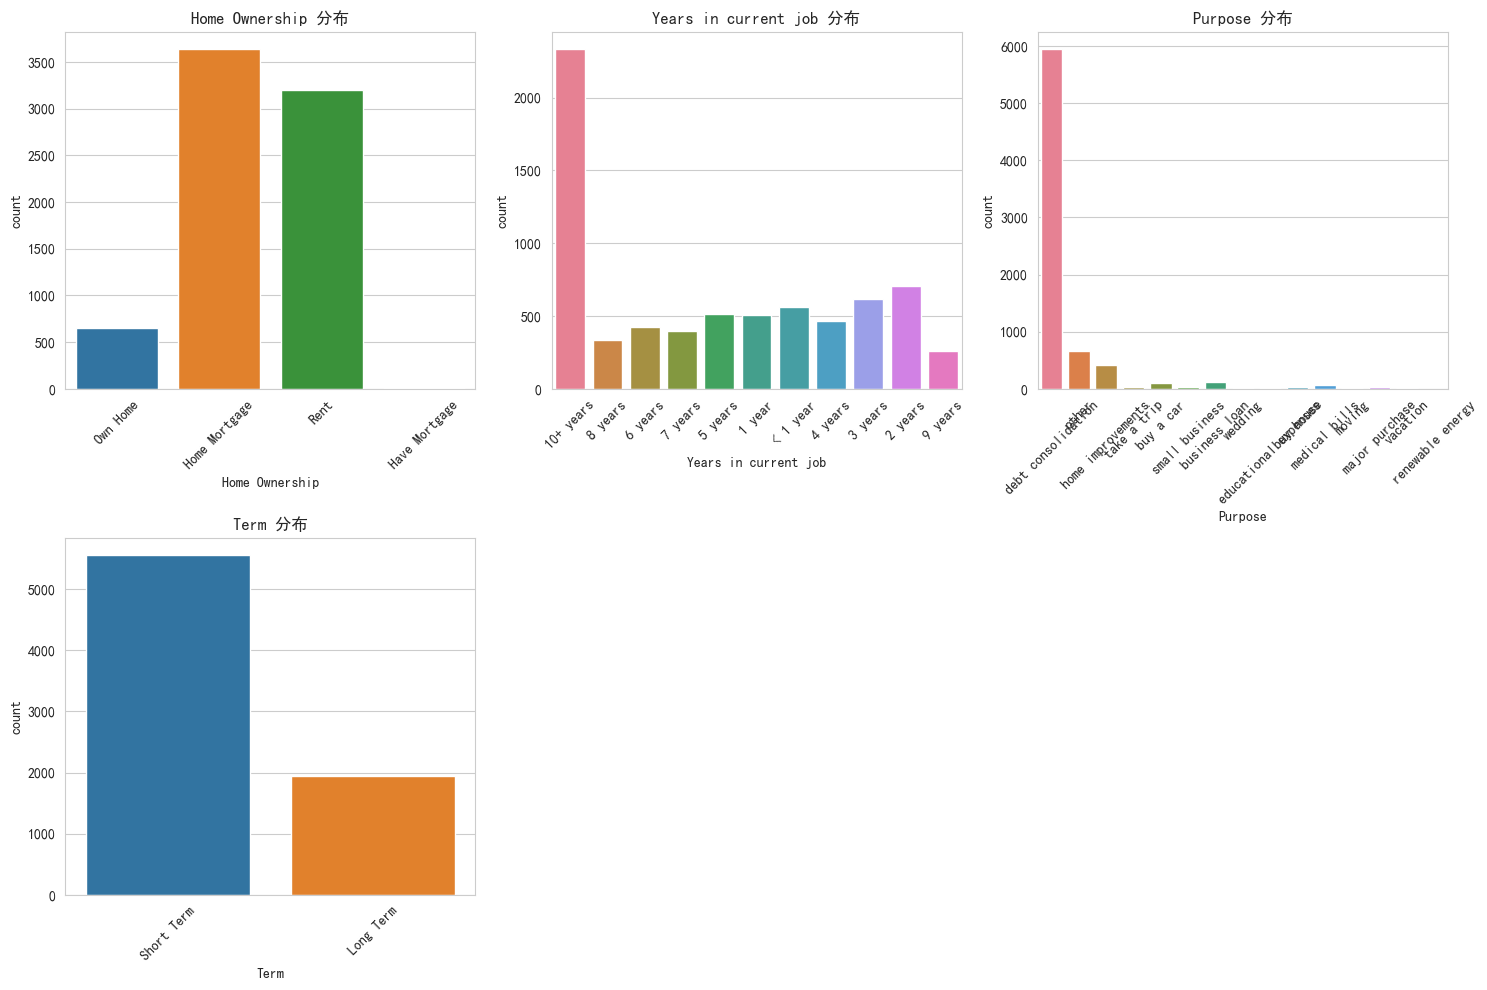

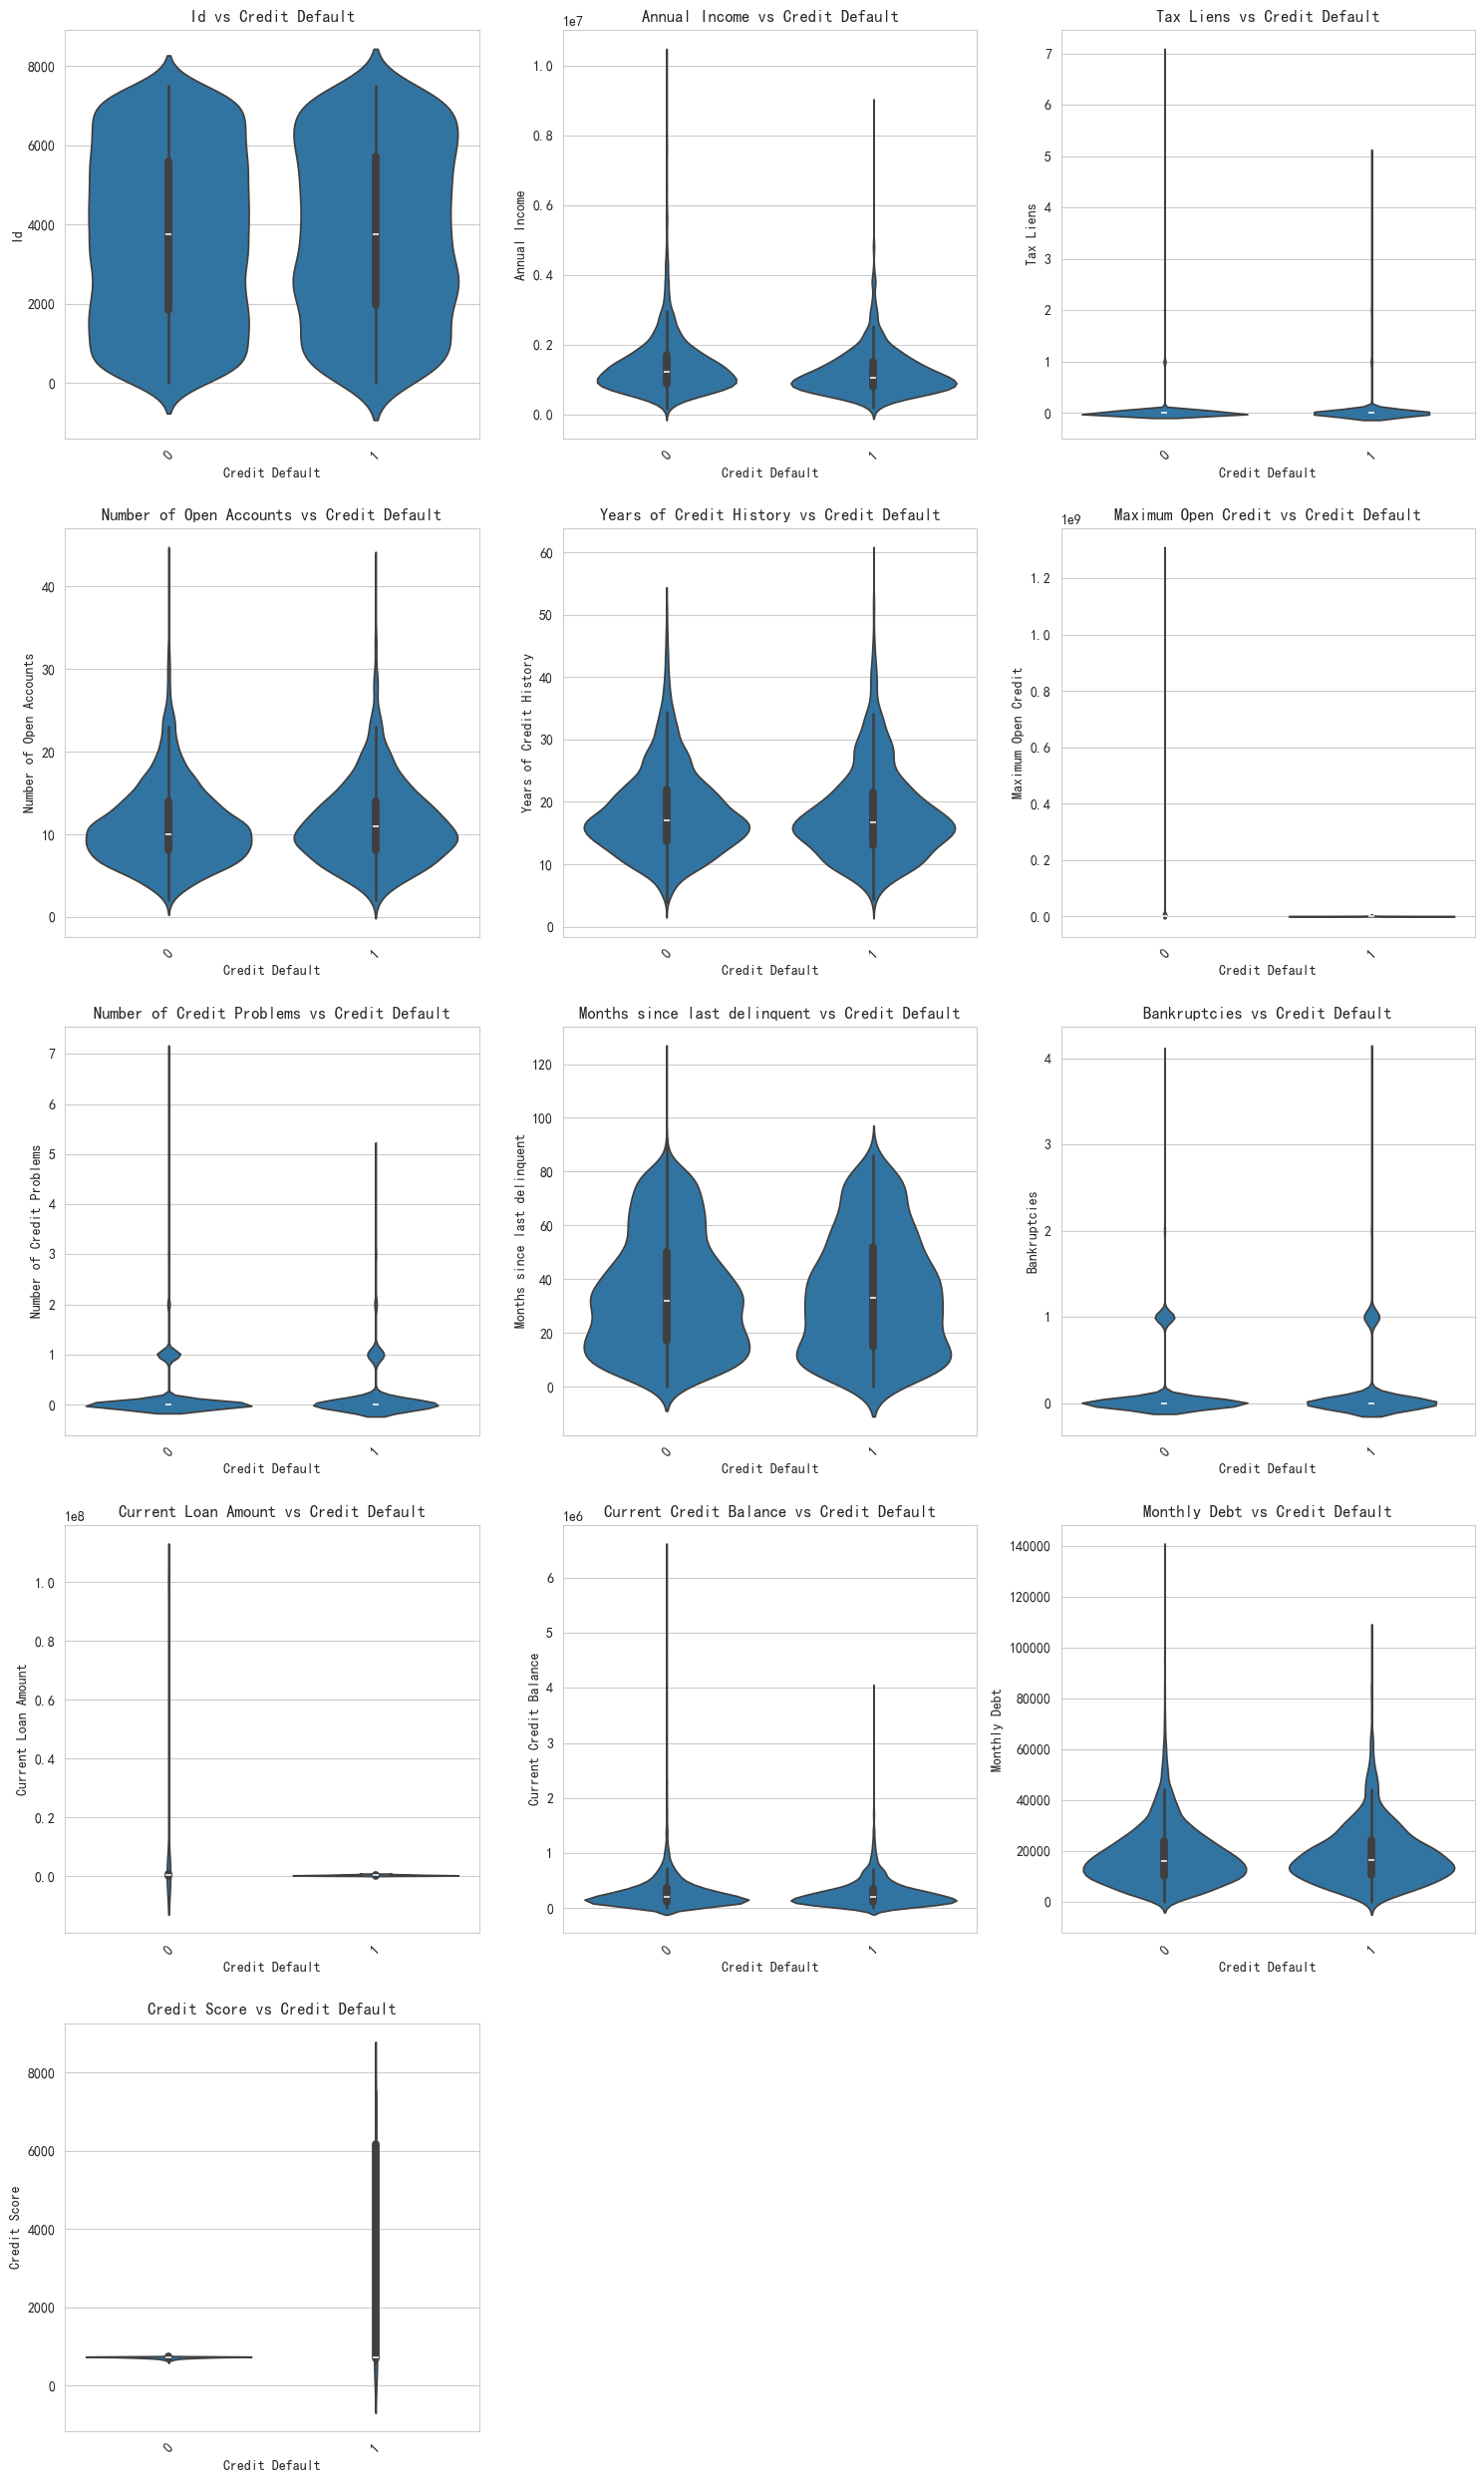

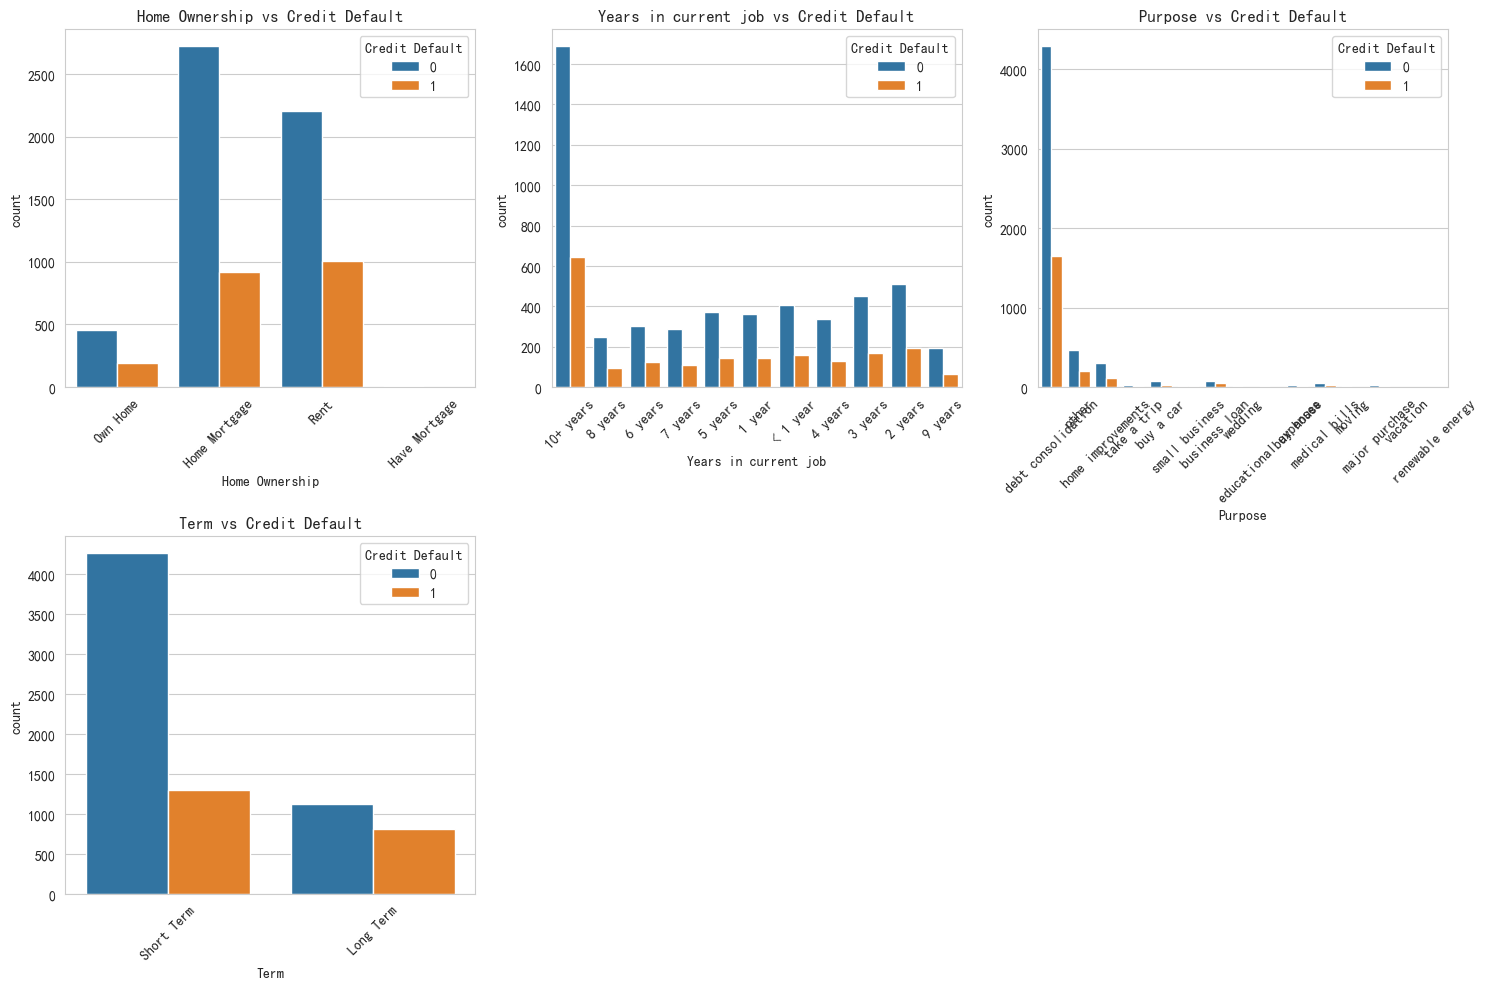

In [47]:
# 1. 首先查看数据类型
print("数据类型概览：")
print(data.dtypes)

# 2. 获取连续变量和离散变量
continuous_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

print("\n连续变量：", continuous_features)
print("\n离散变量：", categorical_features)

# 计算需要的行数（每行3个图）
n_cont = len(continuous_features)
n_rows = (n_cont + 2) // 3  # 向上取整

# 3. 对连续变量进行可视化分析
plt.figure(figsize=(15, 5*n_rows))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(n_rows, 3, i)
    sns.histplot(data[feature], kde=True, color='skyblue')
    plt.title(f'{feature} 分布')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. 对连续变量绘制箱线图
plt.figure(figsize=(15, 5*n_rows))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(n_rows, 3, i)
    sns.boxplot(y=data[feature], color='skyblue')
    plt.title(f'{feature} 箱线图')
plt.tight_layout()
plt.show()

# 计算离散变量需要的行数
n_cat = len(categorical_features)
n_rows_cat = (n_cat + 2) // 3

# 5. 对离散变量进行计数可视化
plt.figure(figsize=(15, 5*n_rows_cat))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(n_rows_cat, 3, i)
    # 修改这里的countplot调用方式
    sns.countplot(data=data, x=feature, hue=feature, legend=False)
    plt.title(f'{feature} 分布')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. 研究与目标变量(Credit Default)的关系
# 连续变量与信用违约的关系
plt.figure(figsize=(15, 5*n_rows))
for i, feature in enumerate(continuous_features, 1):
    if feature != 'Credit Default':
        plt.subplot(n_rows, 3, i)
        sns.violinplot(x='Credit Default', y=feature, data=data)
        plt.title(f'{feature} vs Credit Default')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. 离散变量与信用违约的关系
plt.figure(figsize=(15, 5*n_rows_cat))
for i, feature in enumerate(categorical_features, 1):
    if feature != 'Credit Default':
        plt.subplot(n_rows_cat, 3, i)
        sns.countplot(data=data, x=feature, hue='Credit Default')
        plt.title(f'{feature} vs Credit Default')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()